# Importing relevant modules

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
# Plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

# Reading data from file and forming a table

In [5]:
perfume_df = pd.read_excel('comp_dataset.xlsm', sheet_name='Comp(%)', index_col=0)
product_names = perfume_df[2:5]
new = product_names.T
new = new.drop(columns=['Manufacturer'])
perfume_df = perfume_df.drop(perfume_df.index[range(7)])
perfume_df = perfume_df.fillna(0)
perfume_df.head(5)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284
Ethyl butyrate,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Ethyl 2-methyl butyrate,0.218217,0.0,0.038553,0.0,0.0,0.0,0.972974,0.038193,0.541171,0.0,...,0.0,0.0,0.364843,0.000000,0.978895,0.019335,0.0,0.0,0.191867,0.489353
cis-3-Hexenol,0.000000,0.0,0.000000,0.0,0.0,0.0,0.163699,0.000000,0.099108,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
iso-Amyl Acetate,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
iso-Propyl 2-methyl butyrate,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.056966,0.000000,0.000000,0.0,0.0,0.000000,0.000000


# Scaling of data

In [6]:
from sklearn.preprocessing import StandardScaler
perfume_new = perfume_df.transpose()
features = perfume_df.transpose().columns
xperf = perfume_new.loc[:, features].values
# .loc allows the return of select rows/columns from the dataframe
xperf = StandardScaler().fit_transform(xperf) # normalizing the features
#able to see the statistical data extracted
print(xperf.shape,np.mean(xperf),np.std(xperf))
print(xperf)

(284, 190) -6.8473354817504095e-18 0.9486832980505139
[[-0.10287251  0.16469245 -0.24896214 ... -0.05944383  0.
  -0.05944383]
 [-0.10287251 -0.1780802  -0.24896214 ... -0.05944383  0.
  -0.05944383]
 [-0.10287251 -0.11752229 -0.24896214 ... -0.05944383  0.
  -0.05944383]
 ...
 [-0.10287251 -0.1780802  -0.24896214 ... -0.05944383  0.
  -0.05944383]
 [-0.10287251  0.12330273 -0.24896214 ... -0.05944383  0.
  -0.05944383]
 [-0.10287251  0.59059005 -0.24896214 ... -0.05944383  0.
  -0.05944383]]


# PCA transforamtion of data

In [7]:
from sklearn.decomposition import PCA
pca_perf = PCA(n_components=6, svd_solver = 'auto')
xperf = perfume_new.loc[:, features].values
xperf = StandardScaler().fit_transform(xperf) # normalizing the features
principalComponents_perf = pca_perf.fit_transform(xperf)
# array of the 2 PC values for each sample of data eg each person
pca_df = pd.DataFrame(data=principalComponents_perf, columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,1.436201,-2.192837,-3.360884,1.168181,2.595048,0.745901
1,0.058002,-3.465989,-0.636106,0.058683,1.086661,-2.785548
2,-0.490874,-1.436071,-1.396732,-0.237986,2.050407,4.624302
3,1.884894,-0.224545,-1.078010,0.094760,1.530605,3.147525
4,-2.213858,-2.852718,-1.225381,-1.205033,-1.752125,-2.347067


# Scree Plot

<IPython.core.display.Javascript object>


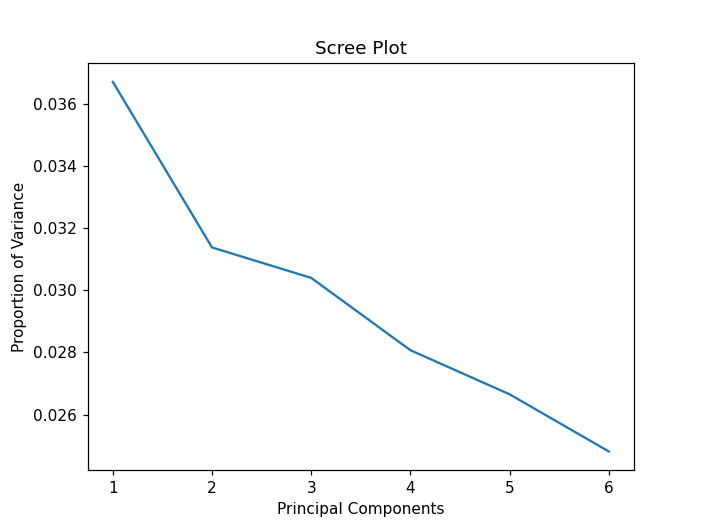

In [8]:
PC_values = np.arange(pca_perf.n_components_) + 1
plt.plot(PC_values, 
         pca_perf.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance')
plt.show()

# Adding Brand + Country labels to data frame

In [9]:
dat1 = pca_df.reset_index(drop=True)
dat2 = new.reset_index(drop=True)
final_df = dat1.join(dat2)
final_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,Brand,Country
0,1.436201,-2.192837,-3.360884,1.168181,2.595048,0.745901,Surf Excel Quick Wash,India
1,0.058002,-3.465989,-0.636106,0.058683,1.086661,-2.785548,Surf Excel Easy Wash,India
2,-0.490874,-1.436071,-1.396732,-0.237986,2.050407,4.624302,Rin,India
3,1.884894,-0.224545,-1.078010,0.094760,1.530605,3.147525,Wheel Act Lem & Jasmine,India
4,-2.213858,-2.852718,-1.225381,-1.205033,-1.752125,-2.347067,Persil Non Bio,UK


# Counting number of countries

In [10]:
total_count = {}
colour_count = {}



for i in final_df['Country'].values.tolist():
    try:
        total_count[i] += 1
    except:
        total_count[i] = 1
        #colour_count[i] = color[cc]
        #cc+=1
        
print (total_count, 2*'\n',
       'Total countries = {}, Total products = {}'.format(len(total_count.keys()),
                                                         sum(total_count.values())))


{'India': 32, 'UK': 21, 'Turkey': 14, 'South Africa': 15, 'Mexico': 14, 'China': 23, 'Brazil': 7, 'Saudi Arabia': 16, 'Thailand': 8, 'Egypt': 12, 'Germany': 27, 'Belgium': 1, 'USA': 14, 'Philippines': 12, 'Chile': 4, 'Argentina': 1, 'Kenya': 2, 'Nigeria': 4, 'Poland': 6, 'France': 3, 'Vietnam': 6, 'Russia': 13, 'Japan': 2, 'Morocco': 6, 'Iran': 2, 'Italy': 2, 'Canada': 1, 'Pakistan': 4, 'Colombia': 6, 'Malaysia': 1, 'Peru': 3, 'Oman': 1, 'Philppines': 1} 

 Total countries = 33, Total products = 284


In [11]:
number_of_colors = len(total_count.keys())
print(number_of_colors)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)
cc = 0
colour_count = total_count.copy()
for i in colour_count.keys():
    colour_count[i] = color[cc]
    cc+=1

33
['#A76675', '#5F6E22', '#79EB56', '#D16DE0', '#CEA629', '#C9B182', '#4874B7', '#210C8C', '#22D45D', '#2468AC', '#13CD59', '#798C61', '#457823', '#E112C3', '#979F35', '#F177E4', '#5A2B3E', '#4AE090', '#CC232E', '#0FDF84', '#CCF09D', '#97CCB5', '#1A0384', '#63480F', '#22B456', '#E43CF1', '#2B9418', '#1C0FE2', '#CD5913', '#92716B', '#67DDA1', '#352192', '#B7C5FF']


# Custom Colour modification

In [12]:
colour_count['India'] = 'orange'
colour_count['China'] = 'red'
colour_count['UK'] = 'blue'
colour_count['USA'] = 'cyan'
colour_count['Turkey'] = 'maroon'
colour_count['South Africa'] = 'limegreen'
colour_count['Mexico'] = 'darkgreen'
colour_count['Saudi Arabia'] = 'green'
colour_count['Germany'] = 'dimgrey'
colour_count['Egypt'] = 'tan'
colour_count['Thailand'] = 'purple'
colour_count['Russia'] = 'royalblue'
colour_count['Pakistan'] = 'olivedrab'
colour_count['Morocco'] = 'coral'
colour_count['Kenya'] = 'orchid'
#print(colour_count)
count_list = list(colour_count.keys())
colours = list(colour_count.values())

**Making a custom list of the colours, turning it into an array, appending it onto the final database**

In [13]:
colour_list = []
for country in dat2['Country'].values.tolist():
    colour_list.append(colour_count[country])
col_array = np.array(colour_list)
final_df['Colour'] = col_array.tolist()
final_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,Brand,Country,Colour
0,1.436201,-2.192837,-3.360884,1.168181,2.595048,0.745901,Surf Excel Quick Wash,India,orange
1,0.058002,-3.465989,-0.636106,0.058683,1.086661,-2.785548,Surf Excel Easy Wash,India,orange
2,-0.490874,-1.436071,-1.396732,-0.237986,2.050407,4.624302,Rin,India,orange
3,1.884894,-0.224545,-1.078010,0.094760,1.530605,3.147525,Wheel Act Lem & Jasmine,India,orange
4,-2.213858,-2.852718,-1.225381,-1.205033,-1.752125,-2.347067,Persil Non Bio,UK,blue


# Grouping scent types
**Product 1 (Surf Excel Quick Wash) has the following values: Aldehydic = 1.7, Amber = 0.0, Aromatic = 13.1**

In [14]:
scent_type = pd.read_excel('comp_dataset.xlsm', sheet_name='PerfDNA', index_col=1,skiprows=9)
scent_type = scent_type.iloc[0:18]
del scent_type['Unnamed: 0']

scents = list(scent_type.index)
print(scents)

['Aldehydic', 'Amber', 'Aromatic', 'Citrus', 'Floral', 'Floral Fruit', 'Fruit', 'Fruit Green', 'Green', 'Herbal', 'Moss', 'Musk', 'Musk Amber', 'Spice', 'Sweet', 'Watery', 'Woody', 'Herbal Sweet']


In [24]:
# chooses row via indexing after single iteration is finished
counting = 0

# Counts number of identified scents (for better data representation on plot)
no_count = 0
# List/array to add to final dataframe
scent_lib = []

for ind in scent_type:
    cur_scent = '\n'
    for index, row in scent_type.iterrows():
        if row[counting]<1:
            continue
        else:
            no_count += 1
            if no_count % 3 == 0 and no_count != 0:
                cur_scent += '\n'
            #print(row[counting], index)
            if row[counting]>20:
                cur_scent += index + ' = Strong'
            elif row[counting]>5:
                cur_scent += index + ' = Medium'
            elif row[counting]>1:
                cur_scent += index + ' = Weak'
            cur_scent += ', '
    scent_lib.append(cur_scent[:-2])
    counting += 1
            
final_df['Scent'] = scent_lib
final_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,Brand,Country,Colour,Scent
0,1.436201,-2.192837,-3.360884,1.168181,2.595048,0.745901,Surf Excel Quick Wash,India,orange,"\nAldehydic = Weak, Aromatic = Medium, \nCitru..."
1,0.058002,-3.465989,-0.636106,0.058683,1.086661,-2.785548,Surf Excel Easy Wash,India,orange,"\nAromatic = Medium, \nCitrus = Medium, Floral..."
2,-0.490874,-1.436071,-1.396732,-0.237986,2.050407,4.624302,Rin,India,orange,"\n\nAldehydic = Weak, Aromatic = Medium, Citru..."
3,1.884894,-0.224545,-1.078010,0.094760,1.530605,3.147525,Wheel Act Lem & Jasmine,India,orange,"\nAldehydic = Weak, \nAromatic = Medium, Citru..."
4,-2.213858,-2.852718,-1.225381,-1.205033,-1.752125,-2.347067,Persil Non Bio,UK,blue,"\nAromatic = Medium, \nCitrus = Medium, Floral..."


# PCA graph 1 - basic scatter plot

<IPython.core.display.Javascript object>


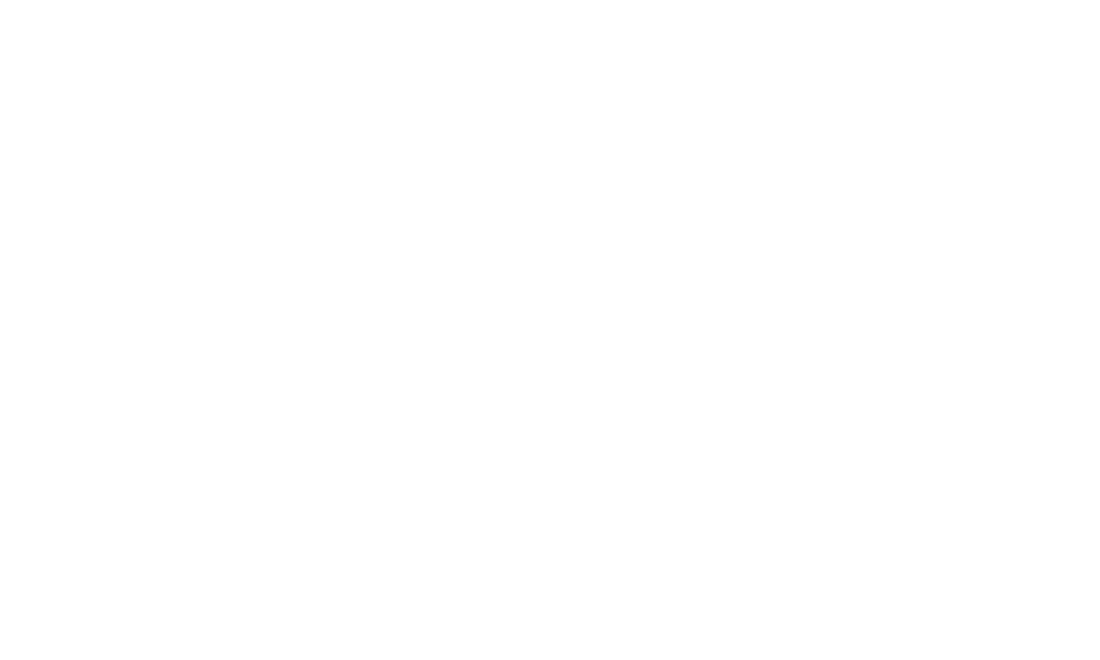

<Figure size 640x480 with 0 Axes>

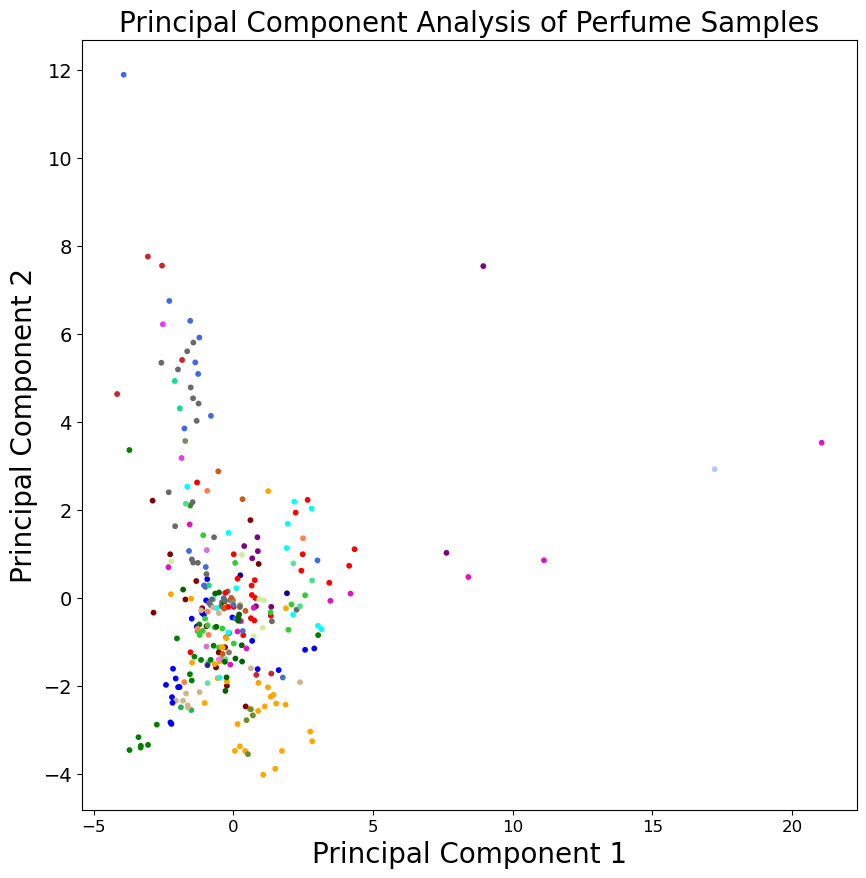

In [22]:

%matplotlib inline
#%matplotlib notebook
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Perfume Samples",fontsize=20)

pc1 = final_df['pc1']
pc2 = final_df['pc2']
test = final_df['Brand'].values.tolist()
test2 = final_df['Country'].values.tolist()
te = []
for i in range(len(test)):
    new_term = test[i] + ' - ' + test2[i]
    te.append(new_term)
    
plt.scatter(pc1, pc2,s = 10,c=final_df['Colour'])

for i,txt in enumerate(te):
    pass
    #plt.annotate(txt,(pc1[i], pc2[i]))

# PCA graph 2 - hovering data labels, custom colours

<IPython.core.display.Javascript object>


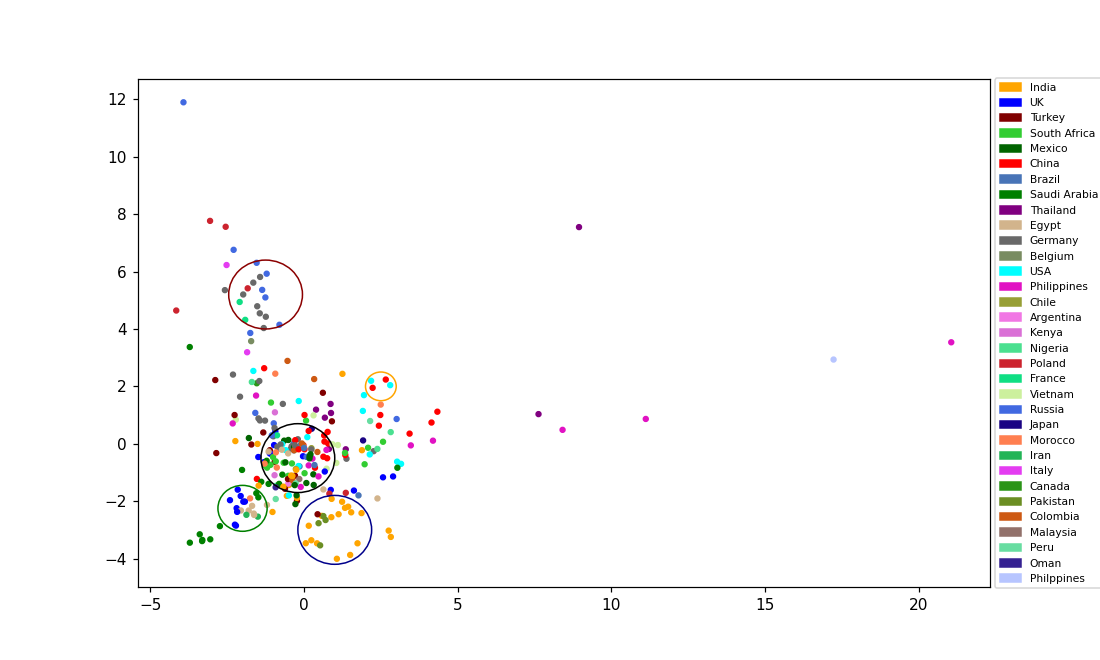

In [23]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
import matplotlib.colors as mcolors
import random
import matplotlib.patches as mpatches
%matplotlib notebook

# Loading the data x variables, y variables and the data point labels for 'names'
x = final_df['pc1']
y = final_df['pc2']
names = te + final_df['Scent']

#plotting graph, changing sizes and shapes of points and graph
fig,ax = plt.subplots(figsize = (10,6))
sc = plt.scatter(x,y,c=final_df['Colour'], s=10)

annot = ax.annotate("", xy=(0,0), xytext=(-50,5),textcoords="offset points", fontsize = 8,
                    arrowprops=dict(arrowstyle="->", alpha=0.5)
                   )
annot.set_visible(False)

# Plotting the legend
patches = []
for i in range(len(colour_count.keys())):
    patches.append(mpatches.Patch(color=colours[i], label=count_list[i]))

plt.legend(handles=patches,fontsize='7',loc='center left', bbox_to_anchor=(1, 0.5))

# these functions were found nline, saved to python courses bookmark
def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
                
# This is plotting custom rings to show self identified clusters

# Mainly India + Pakistan, also one product from Turkey
circle1 = plt.Circle((1, -3), 1.2, color='darkblue', fill=False)
ax.add_patch(circle1)

# MENA (Egypt, Iran, Morocco) and UK
circle2 = plt.Circle((-2, -2.25), 0.8, color='g', fill=False)
ax.add_patch(circle2)

# Europe - Germany, Russia, Poland and France
circle3 = plt.Circle((-1.25, 5.2), 1.2, color='darkred', fill=False)
ax.add_patch(circle3)

# Large central cluster, assum,ed to be basic, similar products
circle4 = plt.Circle((-0.2, -0.5), 1.2, color='black', fill=False)
ax.add_patch(circle4)

# USA (Arm and Hammer brand) and China
circle5 = plt.Circle((2.5, 2), 0.5, color='orange', fill=False)
ax.add_patch(circle5)


fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()